In [2]:
import numpy as np
import pandas as pd

In [3]:
#Data set: SMS Spam Collection Dataset, UCI Machine Learning
df = pd.read_csv('mail_data.csv', encoding='latin-1')

In [4]:
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
'''
Flow of Project:
01: Data Cleaning
02: EDA
03: Text Preprocessing
04: Model Building
05: Evaluation
06: Improvement
07: Website
08: Deployment
'''

'\nFlow of Project:\n01: Data Cleaning\n02: EDA\n03: Text Preprocessing\n04: Model Building\n05: Evaluation\n06: Improvement\n07: Website\n08: Deployment\n'

#01: DATA CLEANING

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#drop last 3 column
#df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [10]:
df.sample(5)

,Category,Message
4579,spam,Urgent! call 09066350750 from your landline. Y...
1745,spam,Someone has conacted our dating service and en...
384,ham,Hey i will be late ah... Meet you at 945+
605,ham,Meet after lunch la...
1482,ham,"I'm a guy, browsin is compulsory"


In [11]:
#rename
df.rename(columns={'Category':'target', 'Message':'text'}, inplace=True)

In [12]:
df.sample(5)

,target,text
1532,ham,Oh dang! I didn't mean o send that to you! Lol!
378,ham,Well there's not a lot of things happening in ...
5527,ham,"Total disappointment, when I texted you was th..."
1766,ham,Hi this is yijue... It's regarding the 3230 te...
3358,ham,"Brainless Baby Doll..:-D;-), vehicle sariyag d..."


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.sample(5)

,target,text
5330,0,Dude im no longer a pisces. Im an aquarius now.
2713,0,Hey you still want to go for yogasana? Coz if ...
244,0,Although i told u dat i'm into baig face watch...
2674,0,"Good afternoon, my boytoy ... How are you feel..."
3121,0,Good evening! this is roger. How are you?


In [16]:
#missing value
df.isnull().sum()

,0
target,0
text,0


In [17]:
#duplicate value
df.duplicated().sum()

np.int64(415)

In [18]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [19]:
df.shape

(5157, 2)

#02: EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

,count
target,
0,4516
1,641


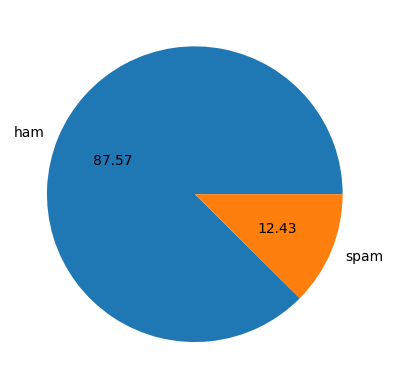

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [23]:
#Data is imbalance

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [27]:
df['text'].apply(len)

,text
0,111
1,29
2,155
3,49
4,61
...,...
5567,161
5568,37
5569,57
5570,125


In [28]:
df['num_characters'] = df['text'].apply(len)

In [29]:
#num of word
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
#no. sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.228040,18.544890,1.969750
std,58.451149,13.401415,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#ham
df[df['target']== 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.951063,17.250664,1.827724
std,56.730031,13.581714,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#spam
df[df['target']== 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.541342,27.663027,2.970359
std,30.516111,7.104050,1.485575
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


#03: Data Preprocessing
1. Lower Case
2. Tokenizatio
3. Removing special character
4. Removing Stop words and punctuation
5. Stemming (Dace = damcing, dances)




In [35]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [37]:
df['transformed_text']= df['text'].apply(transform_text)

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [40]:
spamwc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

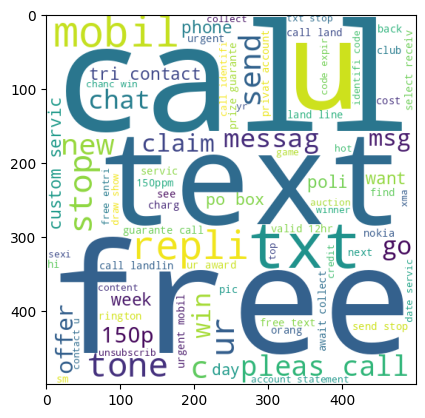

In [41]:
plt.imshow(spamwc)

In [42]:
hamwc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

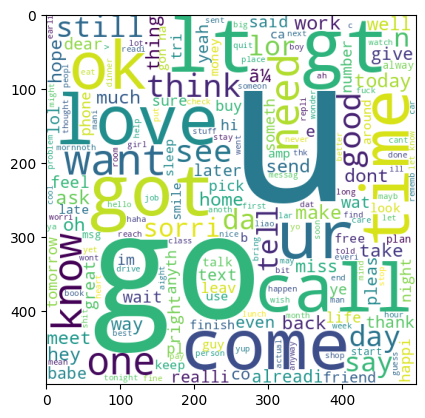

In [43]:
plt.imshow(hamwc)

#04: Model Building

In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer()

In [45]:
x =tfidf.fit_transform(df['transformed_text']).toarray()

In [46]:
x.shape

(5157, 6777)

In [47]:
y = df['target'].values

In [48]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [51]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [52]:
gnb = GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [53]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8691860465116279
[[787 118]
 [ 17 110]]
0.4824561403508772


In [54]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9612403100775194
[[905   0]
 [ 40  87]]
1.0


In [55]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9718992248062015
[[902   3]
 [ 26 101]]
0.9711538461538461


In [56]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [57]:
user_input = input("Enter a message to classify as spam or ham: ")
processed_input = transform_text(user_input)
vectorized_input = tfidf.transform([processed_input])
prediction = mnb.predict(vectorized_input)

if prediction[0] == 1:
  print("This is a spam message.")
else:
  print("This is a ham message.")

Enter a message to classify as spam or ham: yes
This is a ham message.
